# EDA For Simulation Data
### Import necessary libraries, set root path, and visualization styles

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

sys.path.append(os.path.abspath('..'))
from simulator.config import SimulationConfig
from simulator_paper.config import PaperConfig
%matplotlib inline

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

### Load the simulation dataset
NOTE: To simulate the research paper simulation environment, uncomment the second line, and comment the first line

In [7]:
def load_data():
    # file_path = os.path.join('..', SimulationConfig.OUTPUT_FILE)
    file_path = os.path.join('..', PaperConfig.OUTPUT_FILE)
    
    if not os.path.exists(file_path):
        print(f"Error: File not found at {file_path}")
        print("Please run 'scripts/run_simulation.py' (or generate_data) first.")
        return None
    
    print(f"Loading data from: {file_path}")
    df = pd.read_csv(file_path)
    print(f"Successfully loaded {len(df)} rows.")
    return df

df = load_data()
df.head() # type: ignore

Loading data from: ..\data/test_simulation_data.csv
Successfully loaded 30000 rows.


,episode_id,timestamp,optimal_mode,tx_pos_x,tx_pos_y,rx_pos_x,rx_pos_y,distance_tx_rx,distance_bs_rx,tx_speed_mps,...,tx_power_d2d_dbm,rx_power_d2d_dbm,tx_power_bs_dbm,rx_power_cell_dbm,sinr_d2d_db,sinr_cell_db,interference_dbm,noise_dbm,throughput_d2d_mbps,throughput_cell_mbps
0,0,1,D2D,84.128940,193.155813,-177.525721,201.856835,261.799291,268.815110,3,...,23,-54.711330,46,-60.647458,6.983533,1.047405,-61.695118,-104.0,25.832554,11.844341
1,0,2,D2D,81.626831,191.500684,-174.602519,202.531293,256.466673,267.404122,3,...,23,-54.532580,46,-60.561520,7.110642,1.081701,-61.643474,-104.0,26.185198,11.908254
2,0,3,D2D,79.124722,189.845555,-171.679318,203.205751,251.159634,266.019483,3,...,23,-54.350958,46,-60.476746,7.240709,1.114921,-61.591916,-104.0,26.547790,11.970370
3,0,4,D2D,76.622614,188.190425,-168.756117,203.880209,245.879830,264.661608,3,...,23,-54.166419,46,-60.393180,7.373789,1.147028,-61.540454,-104.0,26.920570,12.030603
4,0,5,D2D,74.120505,186.535296,-165.832915,204.554667,240.629054,263.330909,3,...,23,-53.978922,46,-60.310869,7.509933,1.177986,-61.489099,-104.0,27.303770,12.088866


### Check number of D2D and Cellular mode instances

--- Class Balance Statistics ---
optimal_mode
D2D         19558
Cellular    10442
Name: count, dtype: int64

D2D Percentage:      65.19%
Cellular Percentage: 34.81%


C:\Users\Zul Arif Nael\AppData\Local\Temp\ipykernel_11360\836112134.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='optimal_mode', data=df, palette='viridis')


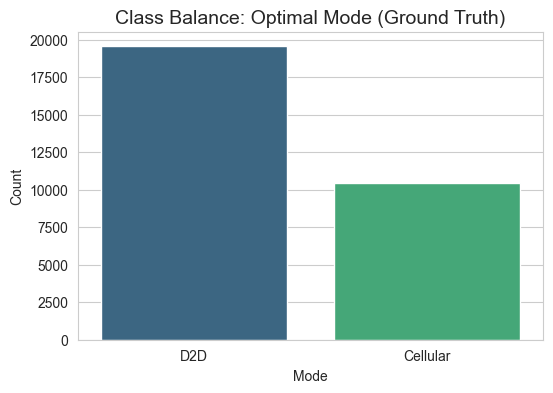

In [8]:
if df is not None:
    plt.figure(figsize=(6, 4))
    ax = sns.countplot(x='optimal_mode', data=df, palette='viridis')
    plt.title('Class Balance: Optimal Mode (Ground Truth)', fontsize=14)
    plt.ylabel('Count')
    plt.xlabel('Mode')
    
    # Calculate and print percentages
    counts = df['optimal_mode'].value_counts()
    total = len(df)
    print("--- Class Balance Statistics ---")
    print(counts)
    print(f"\nD2D Percentage:      {counts.get('D2D', 0) / total * 100:.2f}%")
    print(f"Cellular Percentage: {counts.get('Cellular', 0) / total * 100:.2f}%")
    
    plt.show()

### Comment 1
The 70:30 ratio of D2D and Cellular mode instances indicates a healthy ratio where the model does not guess D2D every time, as there are plenty of counter-examples for the deep learning models to learn **when** to switch. 

### Display distributions for metrics like D2D distance, SINR, throughput, and interference power

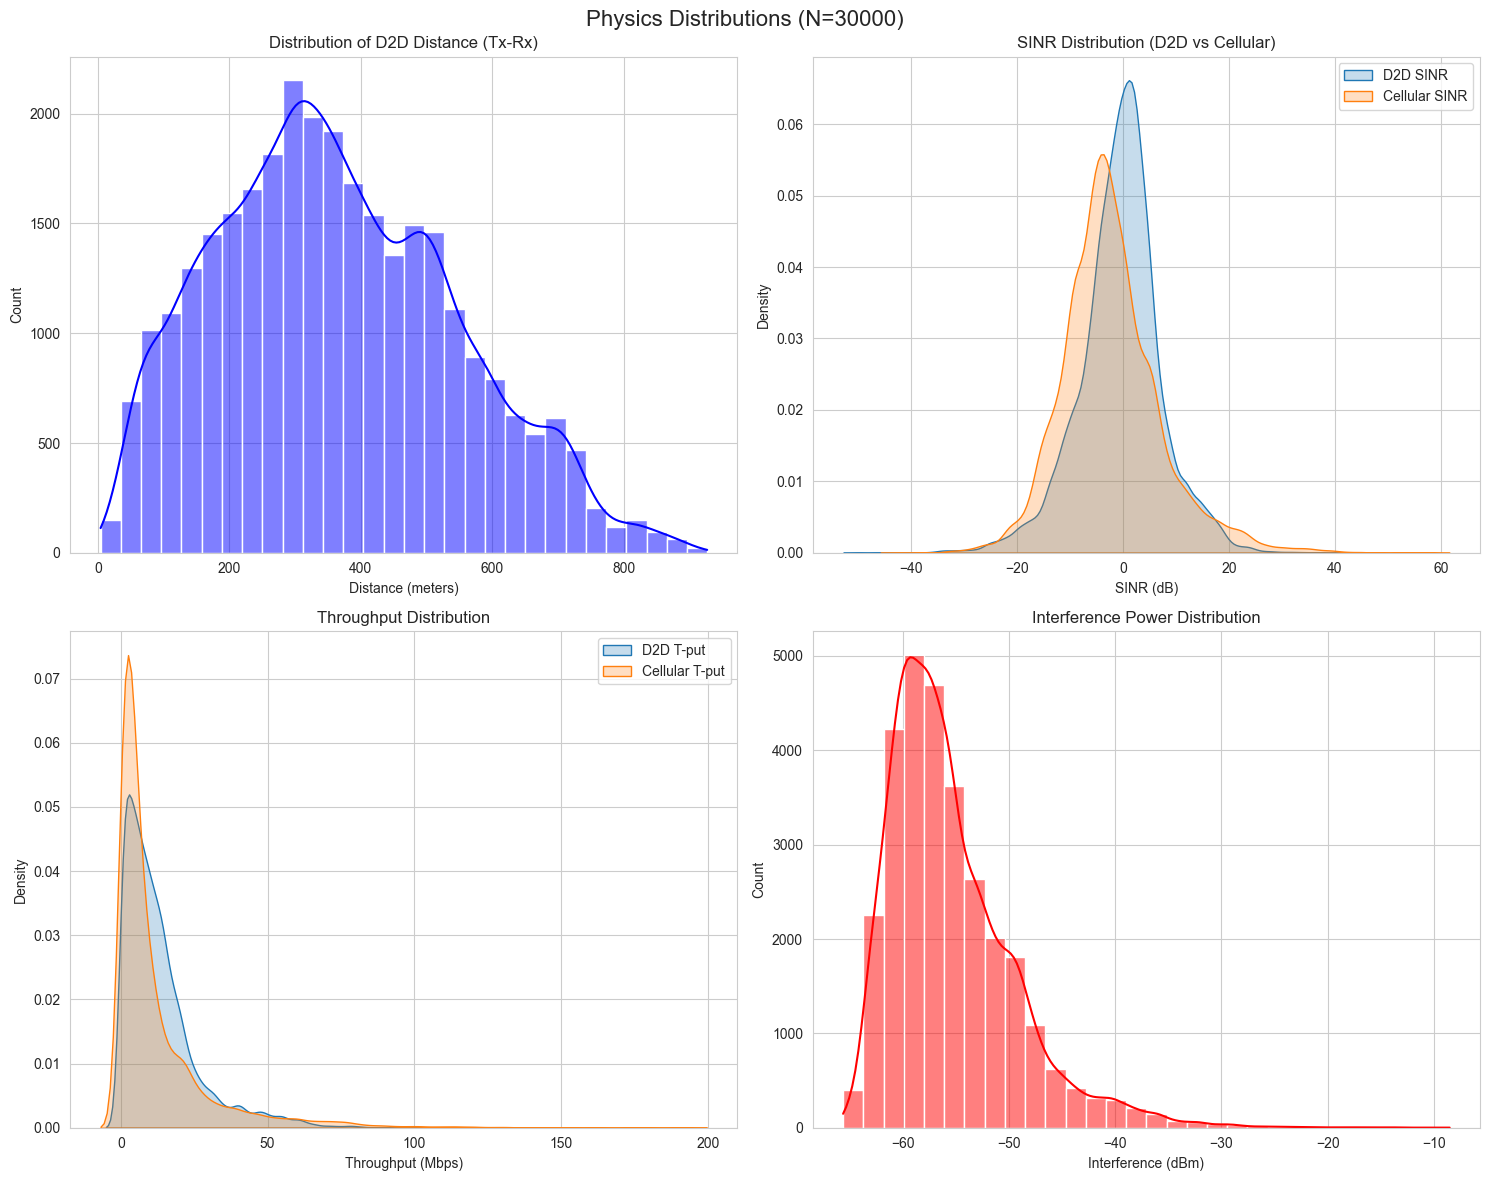

In [9]:
if df is not None:
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle(f'Physics Distributions (N={len(df)})', fontsize=16)

    # 1. Distance Distribution
    sns.histplot(data=df, x='distance_tx_rx', bins=30, kde=True, ax=axes[0, 0], color='blue')
    axes[0, 0].set_title('Distribution of D2D Distance (Tx-Rx)')
    axes[0, 0].set_xlabel('Distance (meters)')

    # 2. SINR Distribution (D2D vs Cellular)
    sns.kdeplot(data=df, x='sinr_d2d_db', label='D2D SINR', fill=True, ax=axes[0, 1])
    sns.kdeplot(data=df, x='sinr_cell_db', label='Cellular SINR', fill=True, ax=axes[0, 1])
    axes[0, 1].set_title('SINR Distribution (D2D vs Cellular)')
    axes[0, 1].set_xlabel('SINR (dB)')
    axes[0, 1].legend()

    # 3. Throughput Distribution
    sns.kdeplot(data=df, x='throughput_d2d_mbps', label='D2D T-put', fill=True, ax=axes[1, 0])
    sns.kdeplot(data=df, x='throughput_cell_mbps', label='Cellular T-put', fill=True, ax=axes[1, 0])
    axes[1, 0].set_title('Throughput Distribution')
    axes[1, 0].set_xlabel('Throughput (Mbps)')
    axes[1, 0].legend()
    
    # 4. Interference Distribution
    # We added interference_dbm in Step 3, let's look at it!
    sns.histplot(data=df, x='interference_dbm', bins=30, kde=True, ax=axes[1, 1], color='red')
    axes[1, 1].set_title('Interference Power Distribution')
    axes[1, 1].set_xlabel('Interference (dBm)')

    plt.tight_layout()
    plt.show()

### Comment 2
The D2D and Cellular curves (SINR Distribution) overlap significantly between -30 and -10 dB, which indicates D2D and Cellular signal qualities are similar in this SINR range. Simple threshold algorithms tend to fail in this 'grey area', so this problem where deep learning models are supposed to overcome. 

The D2D distance distribution showed that the distance between transmitter and receiver can reach up to 800 m, which proves that the random waypoint mobility model is working as intended, where both transmitter and receiver pick random destinations to travel to, and also pausing for a while after reaching their destination before moving to their next one. 

### Correlation analysis for identifying important features and metric relationships

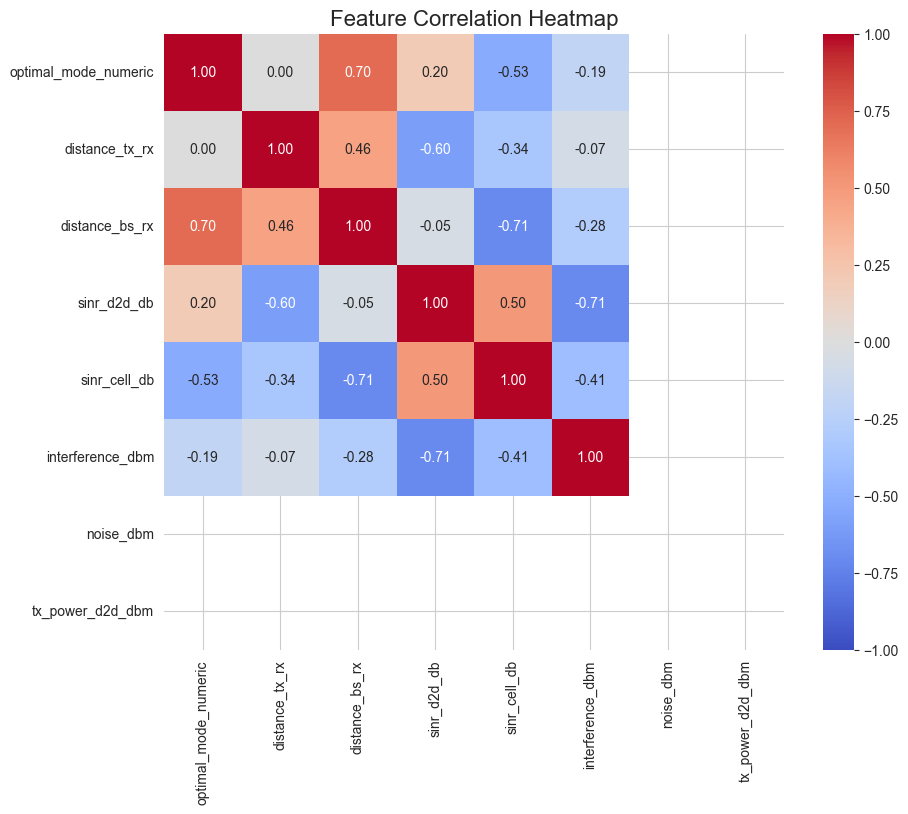

--- Key Correlations with D2D SINR ---
sinr_d2d_db             1.000000
sinr_cell_db            0.503339
optimal_mode_numeric    0.197572
distance_bs_rx         -0.049360
distance_tx_rx         -0.599598
interference_dbm       -0.709469
noise_dbm                    NaN
tx_power_d2d_dbm             NaN
Name: sinr_d2d_db, dtype: float64


In [10]:
if df is not None:
    # 1. Prepare Data for Correlation Analysis (D2D = 1, Cellular = 0)
    corr_df = df.copy()
    corr_df['optimal_mode_numeric'] = corr_df['optimal_mode'].apply(lambda x: 1 if x == 'D2D' else 0)
    
    # Select only numeric columns relevant to Physics
    cols_to_analyze = [
        'optimal_mode_numeric',
        'distance_tx_rx', 'distance_bs_rx',
        'sinr_d2d_db', 'sinr_cell_db',
        'interference_dbm', 'noise_dbm',
        'tx_power_d2d_dbm'
    ]
    
    # Calculate Correlation Matrix
    corr_matrix = corr_df[cols_to_analyze].corr()

    # 2. Plot Heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
    plt.title('Feature Correlation Heatmap', fontsize=16)
    plt.show()

    # 3. Print Key Correlations
    print("--- Key Correlations with D2D SINR ---")
    print(corr_matrix['sinr_d2d_db'].sort_values(ascending=False))

### Comment 3
- Optimal mode vs SINR (D2D): 0.49
    - As D2D SINR increases, the chances of choosing D2D mode increases
- Distance between Tx & Rx vs SINR (D2D): -0.53
    - As distance increases, signal quality decreases
    - Value not -1.0 due to shadowing and Rayleigh fading, making SINR fluctuate even at constant distance over time
- Interference power vs SINR (D2D): -0.42
    - As interference power increases, signal quality decreases
- Noise and Tx power: NaN (Null value)
    - Expected, as their values never change